# Asset Pricing Models

## Data
The stocks selected are Apple, Amazon, Google, Facebook, MacDonald, General Motor, Tesla, and Pfizer, . Below code block will get daily adjusted closing price of each stock

We use S&P 500 to represent the market.

As before, we use 'Adj Close' value to represent asset prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

%matplotlib inline


import importlib.util
import sys

try:
    import yfinance
    print("module 'yfinance' is installed")
except ModuleNotFoundError:
    print("module 'yfinance' is not installed")
    !pip install yfinance

import yfinance as yf

start_date = '2016-01-01'
end_date = '2021-12-31'
stocks = ['^GSPC','AAPL','AMZN','GOOGL','FB', 'MCD', 'GM', 'TSLA','PFE']
df = yf.download(stocks, start_date, end_date)['Adj Close']
df.head(5)


module 'yfinance' is installed
[*********************100%***********************]  9 of 9 completed


,AAPL,AMZN,FB,GM,GOOGL,MCD,PFE,TSLA,^GSPC
Date,,,,,,,,,
2016-01-04,24.220575,636.989990,102.220001,27.775904,759.440002,100.447289,23.763651,44.681999,2012.660034
2016-01-05,23.613623,633.789978,102.730003,27.042112,761.530029,101.831230,23.934717,44.686001,2016.709961
2016-01-06,23.151512,632.650024,102.970001,26.074831,759.330017,101.147812,23.510769,43.807999,1990.260010
2016-01-07,22.174414,607.940002,97.919998,25.007488,741.000000,98.807053,23.354576,43.130001,1943.089966
2016-01-08,22.291668,607.049988,97.330002,24.623917,730.909973,98.653282,23.057066,42.200001,1922.030029


## Visualize 

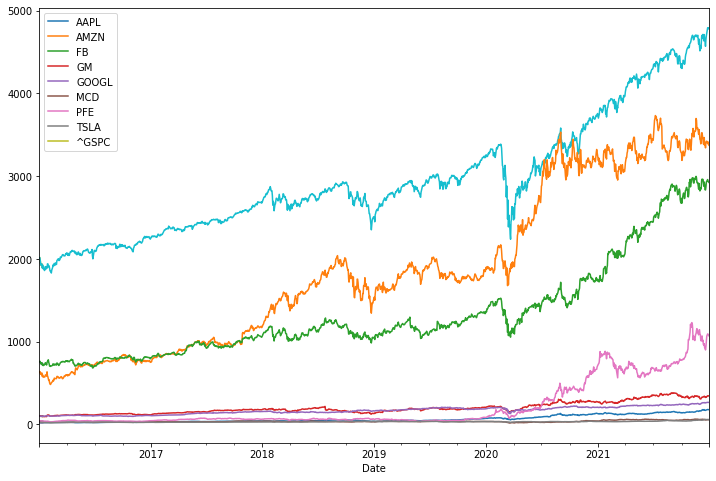

In [2]:
df[0:9].plot(figsize=(12,8))
df['^GSPC'].plot(figsize=(12,8))
df['AAPL'].plot(figsize=(12,8))
df['AMZN'].plot(figsize=(12,8))
df['GOOGL'].plot(figsize=(12,8))
df['FB'].plot(figsize=(12,8))
df['MCD'].plot(figsize=(12,8))
df['GM'].plot(figsize=(12,8))
df['TSLA'].plot(figsize=(12,8))
df['PFE'].plot(figsize=(12,8))


### Convert into returns, and drop the nan 

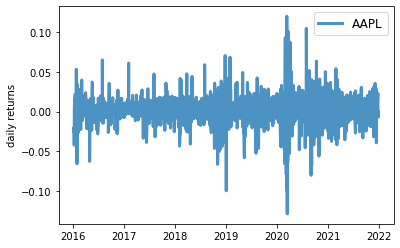

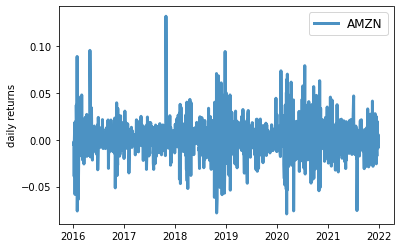

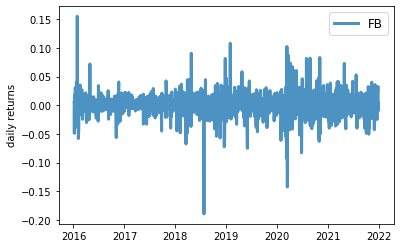

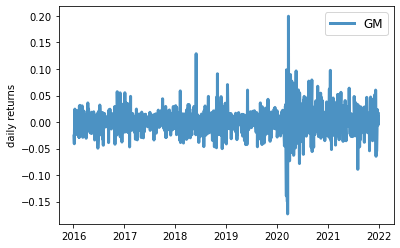

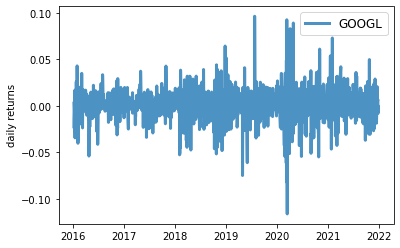

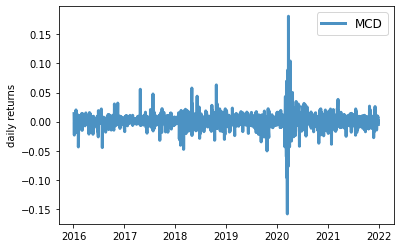

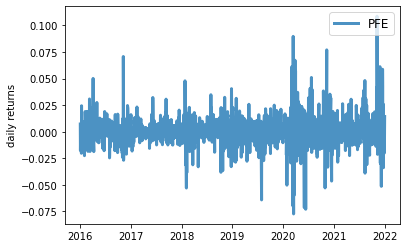

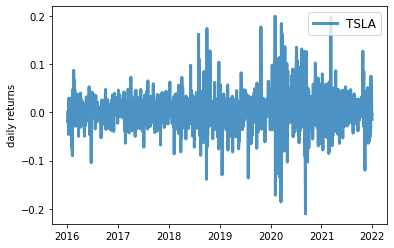

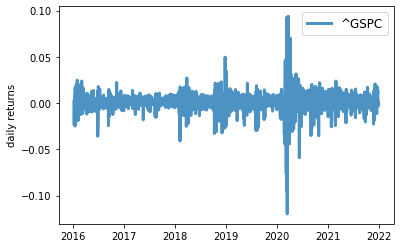

In [3]:
returns = df.pct_change().dropna()

for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
    plt.legend(loc='upper right', fontsize=12)
    plt.ylabel('daily returns')
    plt.show()

# Simple regression
For each stock, we directly run a regression
$$ \tilde{r}_{it}=\alpha_i + \beta_i \tilde{r}_{Mt} +\tilde{\epsilon}_{it}$$


In [4]:
#or statsmodels
import statsmodels.api as sm
alpha_sm=[]
beta_sm=[]

for column in returns.columns[:-1]:
    X=returns['^GSPC']
    Y=returns[column]
    X=sm.add_constant(X)
    capm_model = sm.OLS(Y, X).fit() 
    alpha_sm.append(capm_model.params[0])
    beta_sm.append(capm_model.params[1])

    print('Alpha', column, ": ", capm_model.params[0])
    print('Beta for', column, ": ", capm_model.params[1])
    print(capm_model.summary())
    
    

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Alpha AAPL :  0.0007319469376028732
Beta for AAPL :  1.1900783766032539
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     1857.
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          4.57e-265
Time:                        05:13:37   Log-Likelihood:                 4484.8
No. Observations:                1509   AIC:                            -8966.
Df Residuals:                    1507   BIC:                            -8955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [5]:
alpha_sm

[0.0007319469376028732,
 0.0006718334459748398,
 0.00031337162121044637,
 -9.146406019907591e-06,
 0.000341057314629965,
 0.0002461940071217107,
 0.0002800127538417819,
 0.0019141161277081416]

In [6]:
beta_sm

[1.1900783766032539,
 0.9430281291041933,
 1.0948178714162689,
 1.1879267901581343,
 1.0731315224621878,
 0.7720443963123903,
 0.6495810532156281,
 1.3134354278213887]


# Index Model
To run the index model, we need to find the excess return, or return premium.

## Risk free rate

Approximate the risk-free rate with, for example, the 13 Week (3-month) Treasury Bill (Yahoo finance ticker: ^IRX).

In [7]:
#1. Define the length of the period in days:
num_days=90
#FIRST METHOD: yahoo|
rf_yf = yf.download('^IRX', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [8]:
rf_yf.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,0.165,0.170,0.153,0.155,0.155,0
2016-01-05,0.205,0.205,0.205,0.205,0.205,0
2016-01-06,0.205,0.205,0.198,0.205,0.205,0
2016-01-07,0.190,0.195,0.185,0.190,0.190,0
2016-01-08,0.190,0.195,0.188,0.190,0.190,0


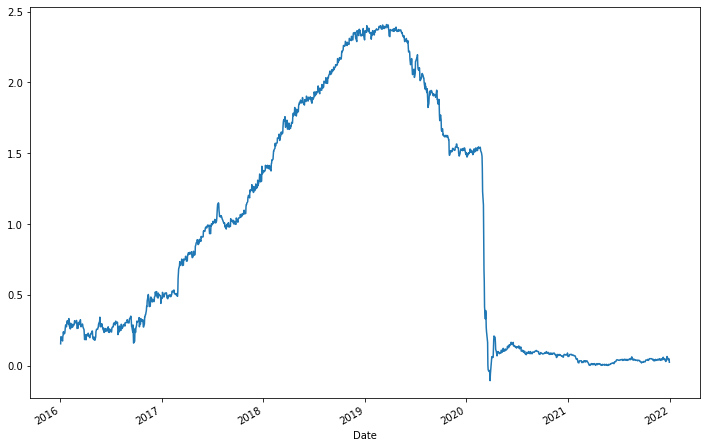

In [9]:
rf_yf['Close'].plot(figsize=(12,8))

## convert to daily rates

In [10]:
rf_yf=rf_yf['Close']/100
rf=(1 + rf_yf*num_days/360)**(1/num_days)-1

In [11]:
rf.round(6)

Date
2016-01-04    0.000004
2016-01-05    0.000006
2016-01-06    0.000006
2016-01-07    0.000005
2016-01-08    0.000005
                ...   
2021-12-23    0.000002
2021-12-27    0.000001
2021-12-28    0.000001
2021-12-29    0.000001
2021-12-30    0.000001
Name: Close, Length: 1508, dtype: float64

### add to the dataset

In [12]:
returns=returns.assign(RiskFree_yf=pd.Series(rf, index=returns.index))

In [13]:
returns.head(6)


,AAPL,AMZN,FB,GM,GOOGL,MCD,PFE,TSLA,^GSPC,RiskFree_yf
Date,,,,,,,,,,
2016-01-05,-0.025059,-0.005024,0.004989,-0.026418,0.002752,0.013778,0.007199,0.000090,0.002012,0.000006
2016-01-06,-0.019570,-0.001799,0.002336,-0.035769,-0.002889,-0.006711,-0.017713,-0.019648,-0.013115,0.000006
2016-01-07,-0.042205,-0.039058,-0.049043,-0.040934,-0.024140,-0.023142,-0.006643,-0.015477,-0.023700,0.000005
2016-01-08,0.005288,-0.001464,-0.006025,-0.015338,-0.013617,-0.001556,-0.012739,-0.021563,-0.010838,0.000005
2016-01-11,0.016192,0.017610,0.001849,0.024382,0.002955,0.010478,0.002258,-0.014929,0.000853,0.000005
2016-01-12,0.014513,0.000243,0.019075,0.001653,0.016738,0.006427,-0.002253,0.010200,0.007803,0.000006


In [14]:
returns.dropna(inplace=True)

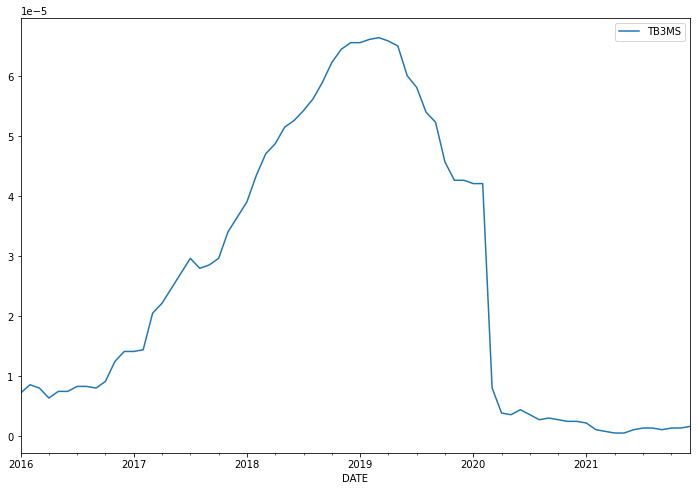

In [15]:
#SECOND:Federal Reserve Economic Data (FRED) database
import pandas_datareader.data as web
rf_fred = web.DataReader('TB3MS', 'fred', start=start_date, end=end_date)
rf_fred=rf_fred/100
rf_fred=(1 + rf_fred*num_days/360)**(1/num_days)-1
rf_fred.plot(figsize=(12,8))

# One factor index model

In [16]:
import statsmodels.api as sm 

Y=returns.AMZN-returns.RiskFree_yf
X=returns['^GSPC']-returns.RiskFree_yf
X=sm.add_constant(X, prepend=False)

index_model = sm.OLS(Y,X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
print(index_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     799.5
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          1.97e-141
Time:                        05:13:39   Log-Likelihood:                 4194.6
No. Observations:                1507   AIC:                            -8385.
Df Residuals:                    1505   BIC:                            -8374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.9430      0.033     28.276      0.0

# CAPM with Monthly Returns
## We use AMZN as an example

In [18]:
%reset -f
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd


import yfinance as yf
import statsmodels.api as sm

risky_asset = 'AMZN'
market_index = '^GSPC'
risk_free='^IRX'
start_date = '2021-01-01'
end_date = '2021-12-31'

df = yf.download([risky_asset, market_index, risk_free],
                 start=start_date,
                 end=end_date,
                 adjusted=True,
                 progress=False)['Adj Close']




In [19]:
df.head(5)

,AMZN,^GSPC,^IRX
Date,,,
2021-01-04,3186.629883,3700.649902,0.068
2021-01-05,3218.510010,3726.860107,0.078
2021-01-06,3138.379883,3748.139893,0.078
2021-01-07,3162.159912,3803.790039,0.080
2021-01-08,3182.699951,3824.679932,0.080


# Resample to monthly data and calculate simple returns:

In [20]:
X = df.rename(columns={risky_asset:'asset', 
                                    market_index: 'market', risk_free:'rf'}).resample('M').last()


X.head(12)

,asset,market,rf
Date,,,
2021-01-31,3206.199951,3714.239990,0.048
2021-02-28,3092.929932,3811.149902,0.035
2021-03-31,3094.080078,3972.889893,0.013
2021-04-30,3467.419922,4181.169922,0.003
2021-05-31,3223.070068,4204.109863,0.008
2021-06-30,3440.159912,4297.500000,0.040
2021-07-31,3327.590088,4395.259766,0.040
2021-08-31,3470.790039,4522.680176,0.040
2021-09-30,3285.040039,4307.540039,0.028


In [21]:
X['asset']=X.asset.pct_change()
X['market']=X.market.pct_change()
X.dropna(inplace=True)

### Convert 90-day T-Bill rate into onr month rate

In [22]:
X['rf']=(1+X['rf']/100/4)**(1/4)-1
X.head(5)

,asset,market,rf
Date,,,
2021-02-28,-0.035328,0.026091,0.000022
2021-03-31,0.000372,0.042439,0.000008
2021-04-30,0.120663,0.052425,0.000002
2021-05-31,-0.070470,0.005486,0.000005
2021-06-30,0.067355,0.022214,0.000025


### Calculate beta using the covariance approach (without adjusting $r_f$ )
Note: BMO reports do it this way
$$\beta_i = \frac{Cov(\tilde{r}_i, \tilde{r}_M)}{\sigma_M^2} $$


In [23]:
covariance = X.cov().iloc[0,1]
market_variance = X.market.var()
beta = covariance / market_variance
beta

0.7539734458280075

In [24]:
X['asset_ex']=X['asset']-X['rf']
X['market_ex']=X['market']-X['rf']
X

,asset,market,rf,asset_ex,market_ex
Date,,,,,
2021-02-28,-0.035328,0.026091,0.000022,-0.035350,0.026070
2021-03-31,0.000372,0.042439,0.000008,0.000364,0.042431
2021-04-30,0.120663,0.052425,0.000002,0.120661,0.052423
2021-05-31,-0.070470,0.005486,0.000005,-0.070475,0.005481
2021-06-30,0.067355,0.022214,0.000025,0.067330,0.022189
2021-07-31,-0.032722,0.022748,0.000025,-0.032747,0.022723
2021-08-31,0.043034,0.028990,0.000025,0.043009,0.028965
2021-09-30,-0.053518,-0.047569,0.000017,-0.053536,-0.047587
2021-10-31,0.026602,0.069144,0.000030,0.026572,0.069114


# CAPM

## Prepare the input and estimate CAPM as a linear regression:

In [25]:

# separate target
y = X['asset_ex']
X= X['market_ex']
# add constant
X = sm.add_constant(X)

# define and fit the regression model 
capm_model = sm.OLS(y, X).fit()

# print results 
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:               asset_ex   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1.828
Date:                Thu, 07 Apr 2022   Prob (F-statistic):              0.209
Time:                        05:13:39   Log-Likelihood:                 17.123
No. Observations:                  11   AIC:                            -30.25
Df Residuals:                       9   BIC:                            -29.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0117      0.022     -0.543      0.6

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))



# Implementing the Fama-French 3-factor model
1. The market factor (MKT): It measures the excess return of the market
2. The size factor, SMB (Small Minus Big): It measures the excess return of stocks with a small market cap over those with a large market cap.
3. The value factor, HML (High Minus Low): It measures the excess return of value stocks over growth stocks. Value stocks have a high book-to-market ratio, while the growth stocks are characterized by a low ratio.

Due to the popularity of this approach, these factors became collectively known as the Fama-rench Factors, or the Three-Factor Model. They have been widely accepted in both academia and the industry as stock market benchmarks and they are often used to evaluate investment performance.

In [26]:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf

# Download data from prof. French's website:
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip

# Define parameters:

In [27]:
risk_asset = 'FB'
market_index = '^GSPC'
start_date = '2016-01-01'
end_date = '2021-12-31'

In [28]:
!curl http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip

In [29]:
# load data from csv
!wget http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip
#factor_df = pd.read_csv(r'C:\Users\wsuo\Python\Data\F-F_Research_Data_Factors.csv', skiprows=3)


--2022-04-07 05:13:40--  http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip
Resolving mba.tuck.dartmouth.edu (mba.tuck.dartmouth.edu)... 129.170.171.144
Connecting to mba.tuck.dartmouth.edu (mba.tuck.dartmouth.edu)|129.170.171.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12579 (12K) [application/x-zip-compressed]
Saving to: ‘F-F_Research_Data_Factors_CSV.zip.5’

F-F_Research_Data_F 100%[===================>]  12.28K  --.-KB/s    in 0s      

2022-04-07 05:13:40 (340 MB/s) - ‘F-F_Research_Data_Factors_CSV.zip.5’ saved [12579/12579]



In [30]:
!unzip F-F_Research_Data_Factors_CSV.zip

Archive:  F-F_Research_Data_Factors_CSV.zip
replace F-F_Research_Data_Factors.CSV? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: F-F_Research_Data_Factors.CSV  


In [31]:
!head F-F_Research_Data_Factors.CSV

This file was created by CMPT_ME_BEME_RETS using the 202202 CRSP database.
The 1-month TBill return is from Ibbotson and Associates, Inc.

,Mkt-RF,SMB,HML,RF
192607,    2.96,   -2.38,   -2.73,    0.22
192608,    2.64,   -1.47,    4.14,    0.25
192609,    0.36,   -1.39,    0.12,    0.23
192610,   -3.24,   -0.13,    0.65,    0.32
192611,    2.53,   -0.16,   -0.38,    0.31
192612,    2.62,   -0.02,    0.00,    0.28


In [32]:
factor_df = pd.read_csv('/content/F-F_Research_Data_Factors.CSV', skiprows=3)

STR_TO_MATCH = ' Annual Factors: January-December '
indices = factor_df.iloc[:, 0] == STR_TO_MATCH
start_of_annual = factor_df[indices].index[0]

# keep only monthly data
factor_df = factor_df[factor_df.index < start_of_annual]
factor_df.head

<bound method NDFrame.head of      Unnamed: 0    Mkt-RF       SMB       HML        RF
0        192607      2.96     -2.38     -2.73      0.22
1        192608      2.64     -1.47      4.14      0.25
2        192609      0.36     -1.39      0.12      0.23
3        192610     -3.24     -0.13      0.65      0.32
4        192611      2.53     -0.16     -0.38      0.31
...         ...       ...       ...       ...       ...
1143     202110      6.65     -2.28     -0.44      0.00
1144     202111     -1.55     -1.35     -0.53      0.00
1145     202112      3.10     -1.57      3.23      0.01
1146     202201     -6.24     -5.87     12.79      0.00
1147     202202     -2.29      2.19      3.12      0.00

[1148 rows x 5 columns]>

In [33]:
# rename columns
factor_df.columns = ['date', 'mkt', 'smb', 'hml', 'rf']

# convert strings to datetime
factor_df['date'] = pd.to_datetime(factor_df['date'], 
                                   format='%Y%m').dt.strftime("%Y-%m")

# set index
factor_df = factor_df.set_index('date')

# filter only required dates
factor_df = factor_df.loc[start_date:end_date]
factor_df.head

<bound method NDFrame.head of               mkt       smb       hml        rf
date                                           
2016-02     -0.08      0.81     -0.57      0.02
2016-03      6.96      0.75      1.10      0.02
2016-04      0.92      0.67      3.21      0.01
2016-05      1.78     -0.19     -1.65      0.01
2016-06     -0.05      0.59     -1.45      0.02
...           ...       ...       ...       ...
2021-08      2.90     -0.48     -0.13      0.00
2021-09     -4.37      0.80      5.09      0.00
2021-10      6.65     -2.28     -0.44      0.00
2021-11     -1.55     -1.35     -0.53      0.00
2021-12      3.10     -1.57      3.23      0.01

[71 rows x 4 columns]>

# Convert the values to numeric and divide by 100:

In [34]:
factor_df = factor_df.apply(pd.to_numeric,errors='coerce').div(100)
factor_df.head()

,mkt,smb,hml,rf
date,,,,
2016-02,-0.0008,0.0081,-0.0057,0.0002
2016-03,0.0696,0.0075,0.0110,0.0002
2016-04,0.0092,0.0067,0.0321,0.0001
2016-05,0.0178,-0.0019,-0.0165,0.0001
2016-06,-0.0005,0.0059,-0.0145,0.0002


# Download the prices of the risky asset:

In [35]:
asset_df = yf.download(risk_asset,
                       start=start_date,
                       end=end_date,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 1510 rows of data.


In [36]:
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
y.head()

Date
2016-02   -0.047144
2016-03    0.067153
2016-04    0.030500
2016-05    0.010461
2016-06   -0.038128
Name: rtn, dtype: float64

# Merge the datasets and calculate excess returns

In [37]:
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

# Estimate the three-factor model:

In [38]:
ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml', 
                   data=ff_data).fit()

# print results 
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     19.26
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           4.11e-09
Time:                        05:13:58   Log-Likelihood:                 102.04
No. Observations:                  71   AIC:                            -196.1
Df Residuals:                      67   BIC:                            -187.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0016      0.008     -0.212      0.8

# Implementing the rolling three-factor model on a portfolio of assets
Another way to download the Fama-French factors

In [39]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

# Print available datasets

In [40]:
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

## Download the selected dataset:

In [41]:
ff_dict = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                         start='2014-01-01')
ff_dict.keys()

dict_keys([0, 1, 'DESCR'])

## Inspect the description of the dataset

In [42]:
print(ff_dict['DESCR'])

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202202 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2022 Kenneth R. French

  0 : (98 rows x 4 cols)
  1 : Annual Factors: January-December (8 rows x 4 cols)


In [43]:
ff_dict[0].head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2014-01,-3.32,0.92,-2.02,0.0
2014-02,4.65,0.37,-0.31,0.0
2014-03,0.43,-1.87,4.92,0.0
2014-04,-0.19,-4.20,1.14,0.0
2014-05,2.06,-1.89,-0.13,0.0


In [44]:
ff_dict[1].head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2014,11.71,-7.80,-1.46,0.02
2015,0.07,-3.93,-9.53,0.02
2016,13.30,6.63,22.64,0.20
2017,21.51,-4.95,-13.48,0.80
2018,-6.93,-3.34,-9.80,1.81


# Implementing the rolling three-factor model on a portfolio of assets

In [45]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf
import pandas_datareader.data as web
ASSETS = ['^GSPC','AAPL','AMZN','GOOGL','FB', 'MCD', 'GM', 'TSLA','PFE']
WEIGHTS = [0.11, 0.11, 0.11, 0.11,0.11, 0.11, 0.11, 0.11, 0.11]
START_DATE = '2016-01-01'
END_DATE = '2021-12-31'

#Download the factor related data:
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                                 start=START_DATE)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()

#Download the prices of risky assets from Yahoo Finance:
asset_df = yf.download(ASSETS,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')


Downloaded 1510 rows of data.


In [46]:
#Calculate the monthly returns on the risky assets:
asset_df = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
# reformat index for joining
asset_df.index = asset_df.index.strftime('%Y-%m')

#Calculate the portfolio returns:
asset_df['portfolio_returns'] = np.matmul(asset_df[ASSETS].values,WEIGHTS)


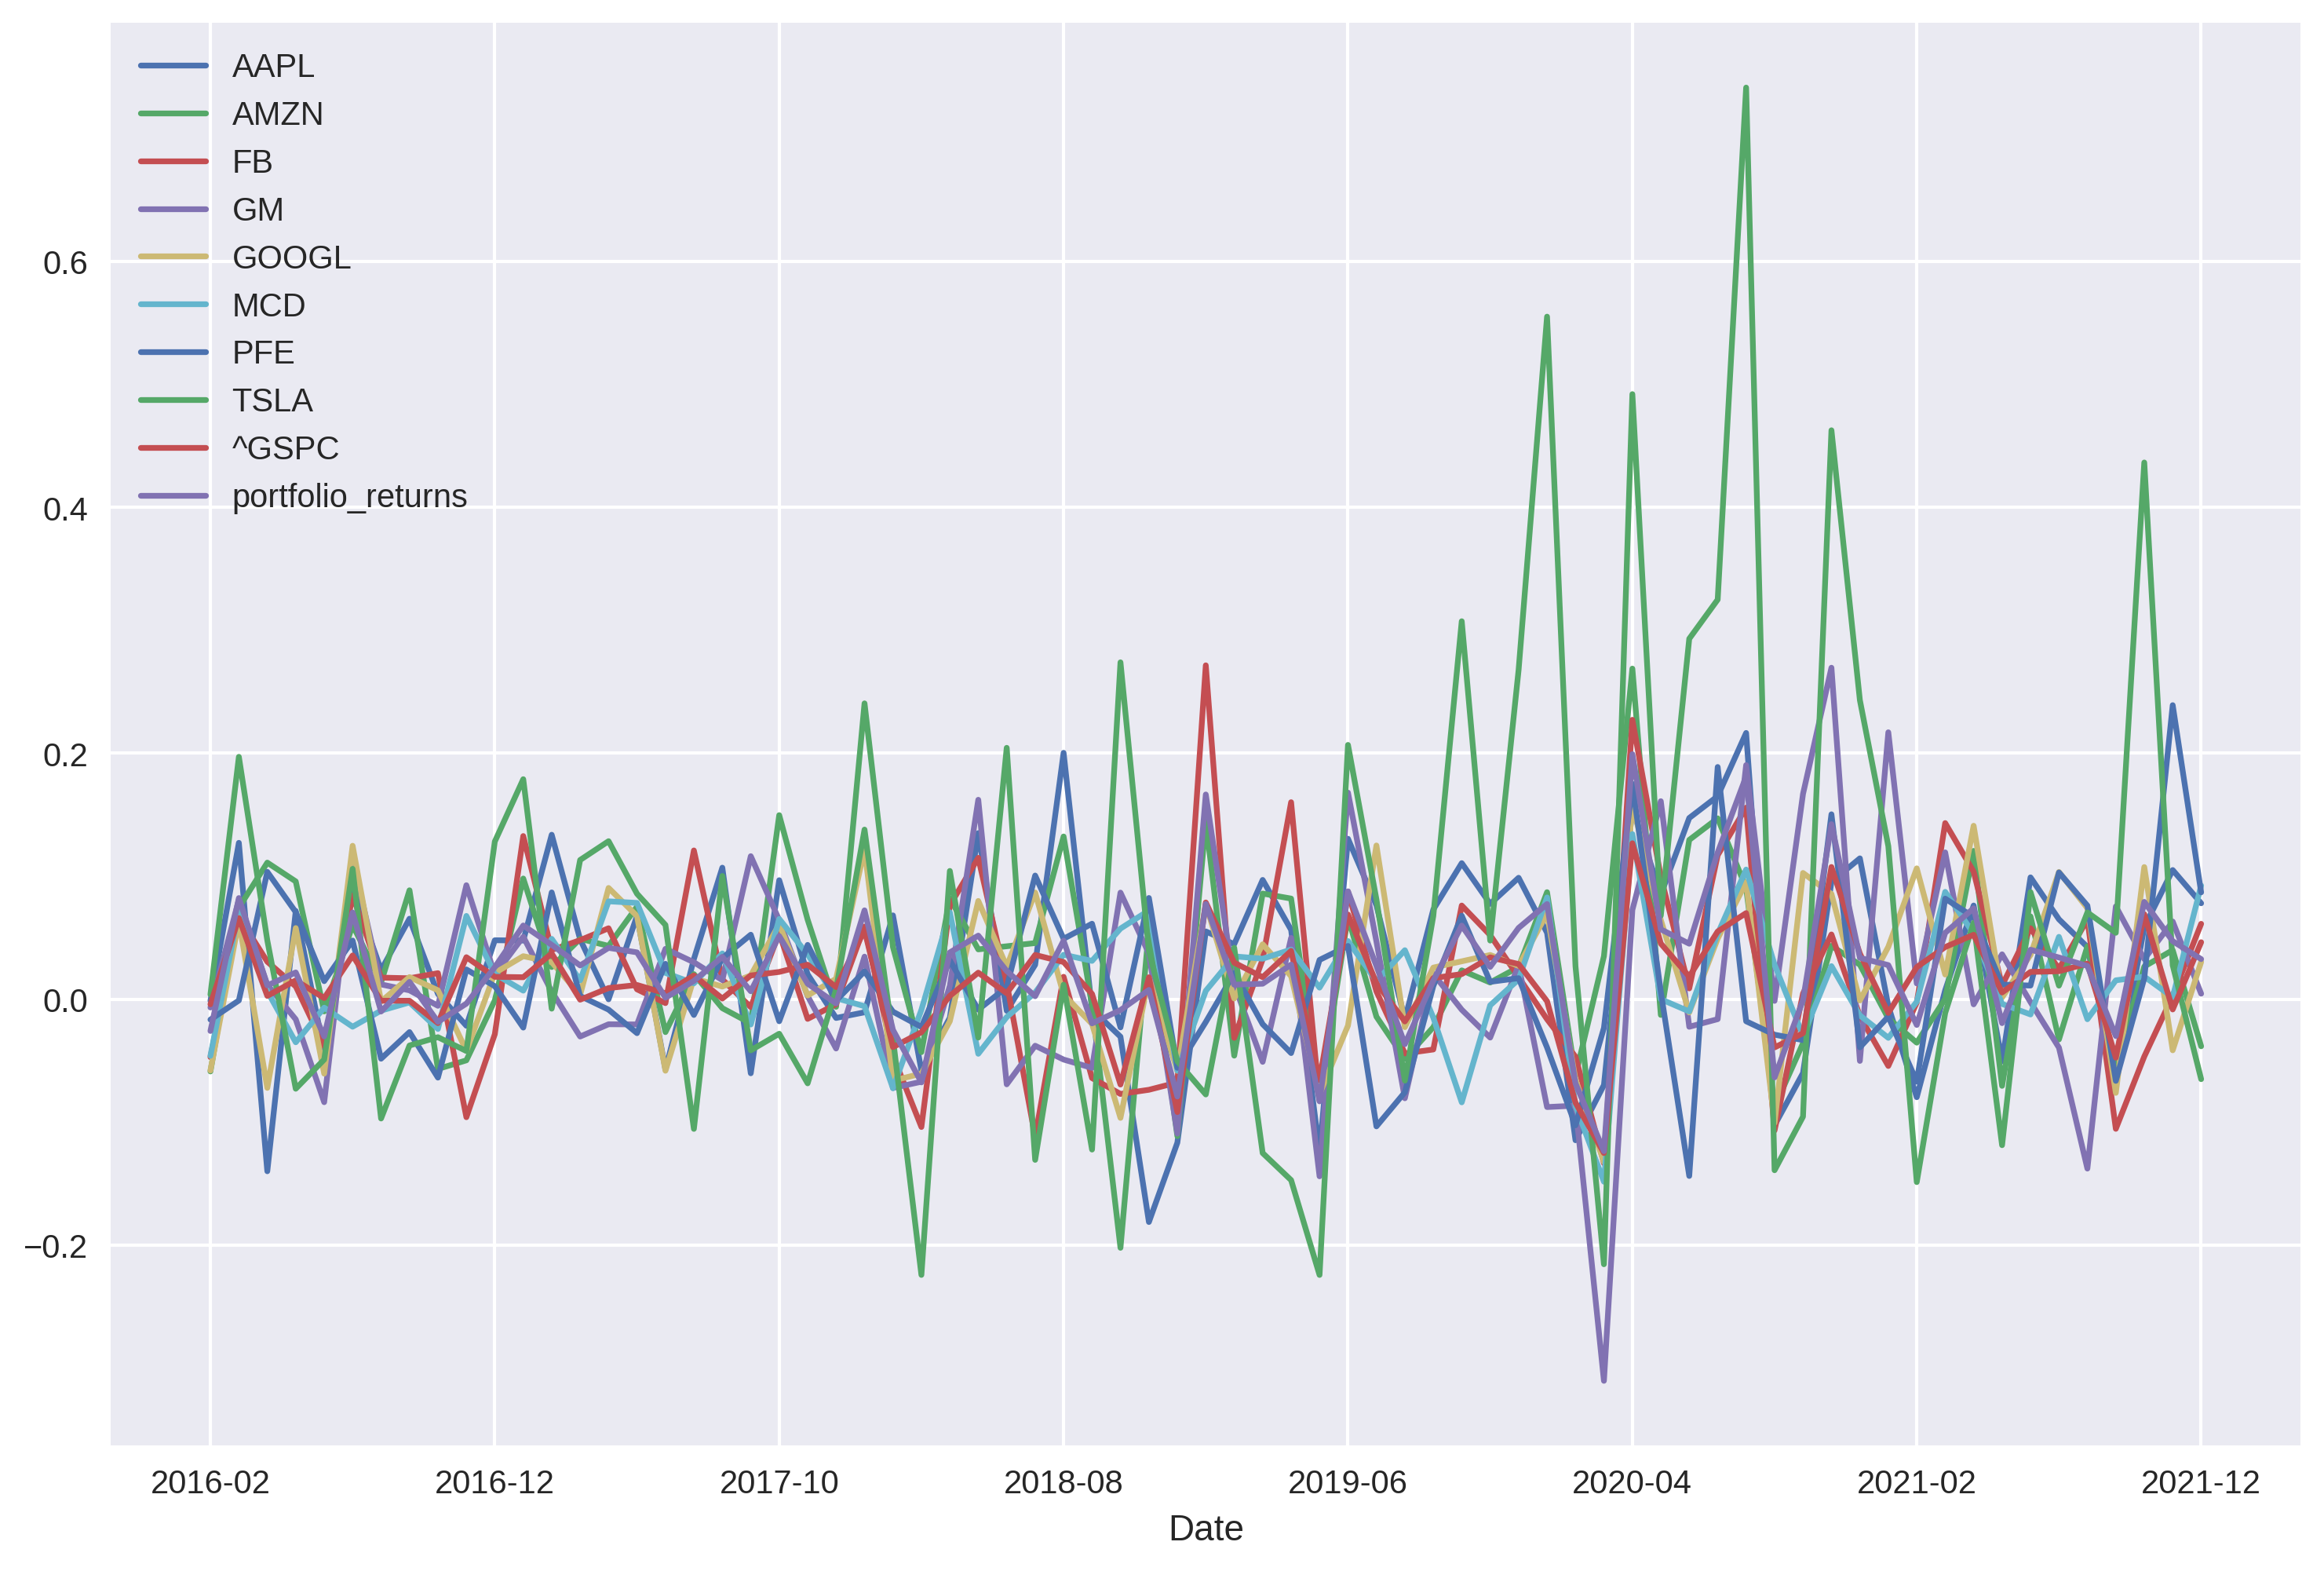

In [47]:
asset_df.plot()

In [48]:
#Merge the datasets:
ff_data = asset_df.join(df_three_factor).drop(ASSETS, axis=1)
print(ff_data)
ff_data.columns = ['portf_rtn', 'mkt', 'smb', 'hml', 'rf']
ff_data['portf_ex_rtn'] = ff_data.portf_rtn - ff_data.rf
ff_data.head()
#is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
#is_number(ff_data.dtypes)
#ff_data = ff_data.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())





         portfolio_returns  Mkt-RF     SMB     HML      RF
Date                                                      
2016-02          -0.025832 -0.0008  0.0081 -0.0057  0.0002
2016-03           0.082285  0.0696  0.0075  0.0110  0.0002
2016-04           0.011206  0.0092  0.0067  0.0321  0.0001
2016-05           0.021771  0.0178 -0.0019 -0.0165  0.0001
2016-06          -0.030279 -0.0005  0.0059 -0.0145  0.0002
...                    ...     ...     ...     ...     ...
2021-08           0.027064  0.0290 -0.0048 -0.0013  0.0000
2021-09          -0.029944 -0.0437  0.0080  0.0509  0.0000
2021-10           0.079182  0.0665 -0.0228 -0.0044  0.0000
2021-11           0.047249 -0.0155 -0.0135 -0.0053  0.0000
2021-12           0.032630  0.0310 -0.0157  0.0323  0.0001

[71 rows x 5 columns]


,portf_rtn,mkt,smb,hml,rf,portf_ex_rtn
Date,,,,,,
2016-02,-0.025832,-0.0008,0.0081,-0.0057,0.0002,-0.026032
2016-03,0.082285,0.0696,0.0075,0.0110,0.0002,0.082085
2016-04,0.011206,0.0092,0.0067,0.0321,0.0001,0.011106
2016-05,0.021771,0.0178,-0.0019,-0.0165,0.0001,0.021671
2016-06,-0.030279,-0.0005,0.0059,-0.0145,0.0002,-0.030479


# Define a function for the rolling n-factor model

In [49]:
def rolling_factor_model(input_data, formula, window_size):
    '''
    Function for estimating the Fama-French (n-factor) model using a rolling window of fixed size.
    
    Parameters
    ------------
    input_data : pd.DataFrame
        A DataFrame containing the factors and asset/portfolio returns
    formula : str
        `statsmodels` compatible formula representing the OLS regression  
    window_size : int
        Rolling window length.
    
    Returns
    -----------
    coeffs_df : pd.DataFrame
        DataFrame containing the intercept and the three factors for each iteration.
    '''

    coeffs = []
    
    for start_index in range(len(input_data) - window_size + 1):        
        end_index = start_index + window_size

        # define and fit the regression model 
        ff_model = smf.ols(
            formula=formula, 
            data=input_data[start_index:end_index]
        ).fit()
   
        # store coefficients
        coeffs.append(ff_model.params)
    
    coeffs_df = pd.DataFrame(
        coeffs, 
        index=input_data.index[window_size - 1:]
    )

    return coeffs_df



# Estimate the rolling three-factor model and plot the results

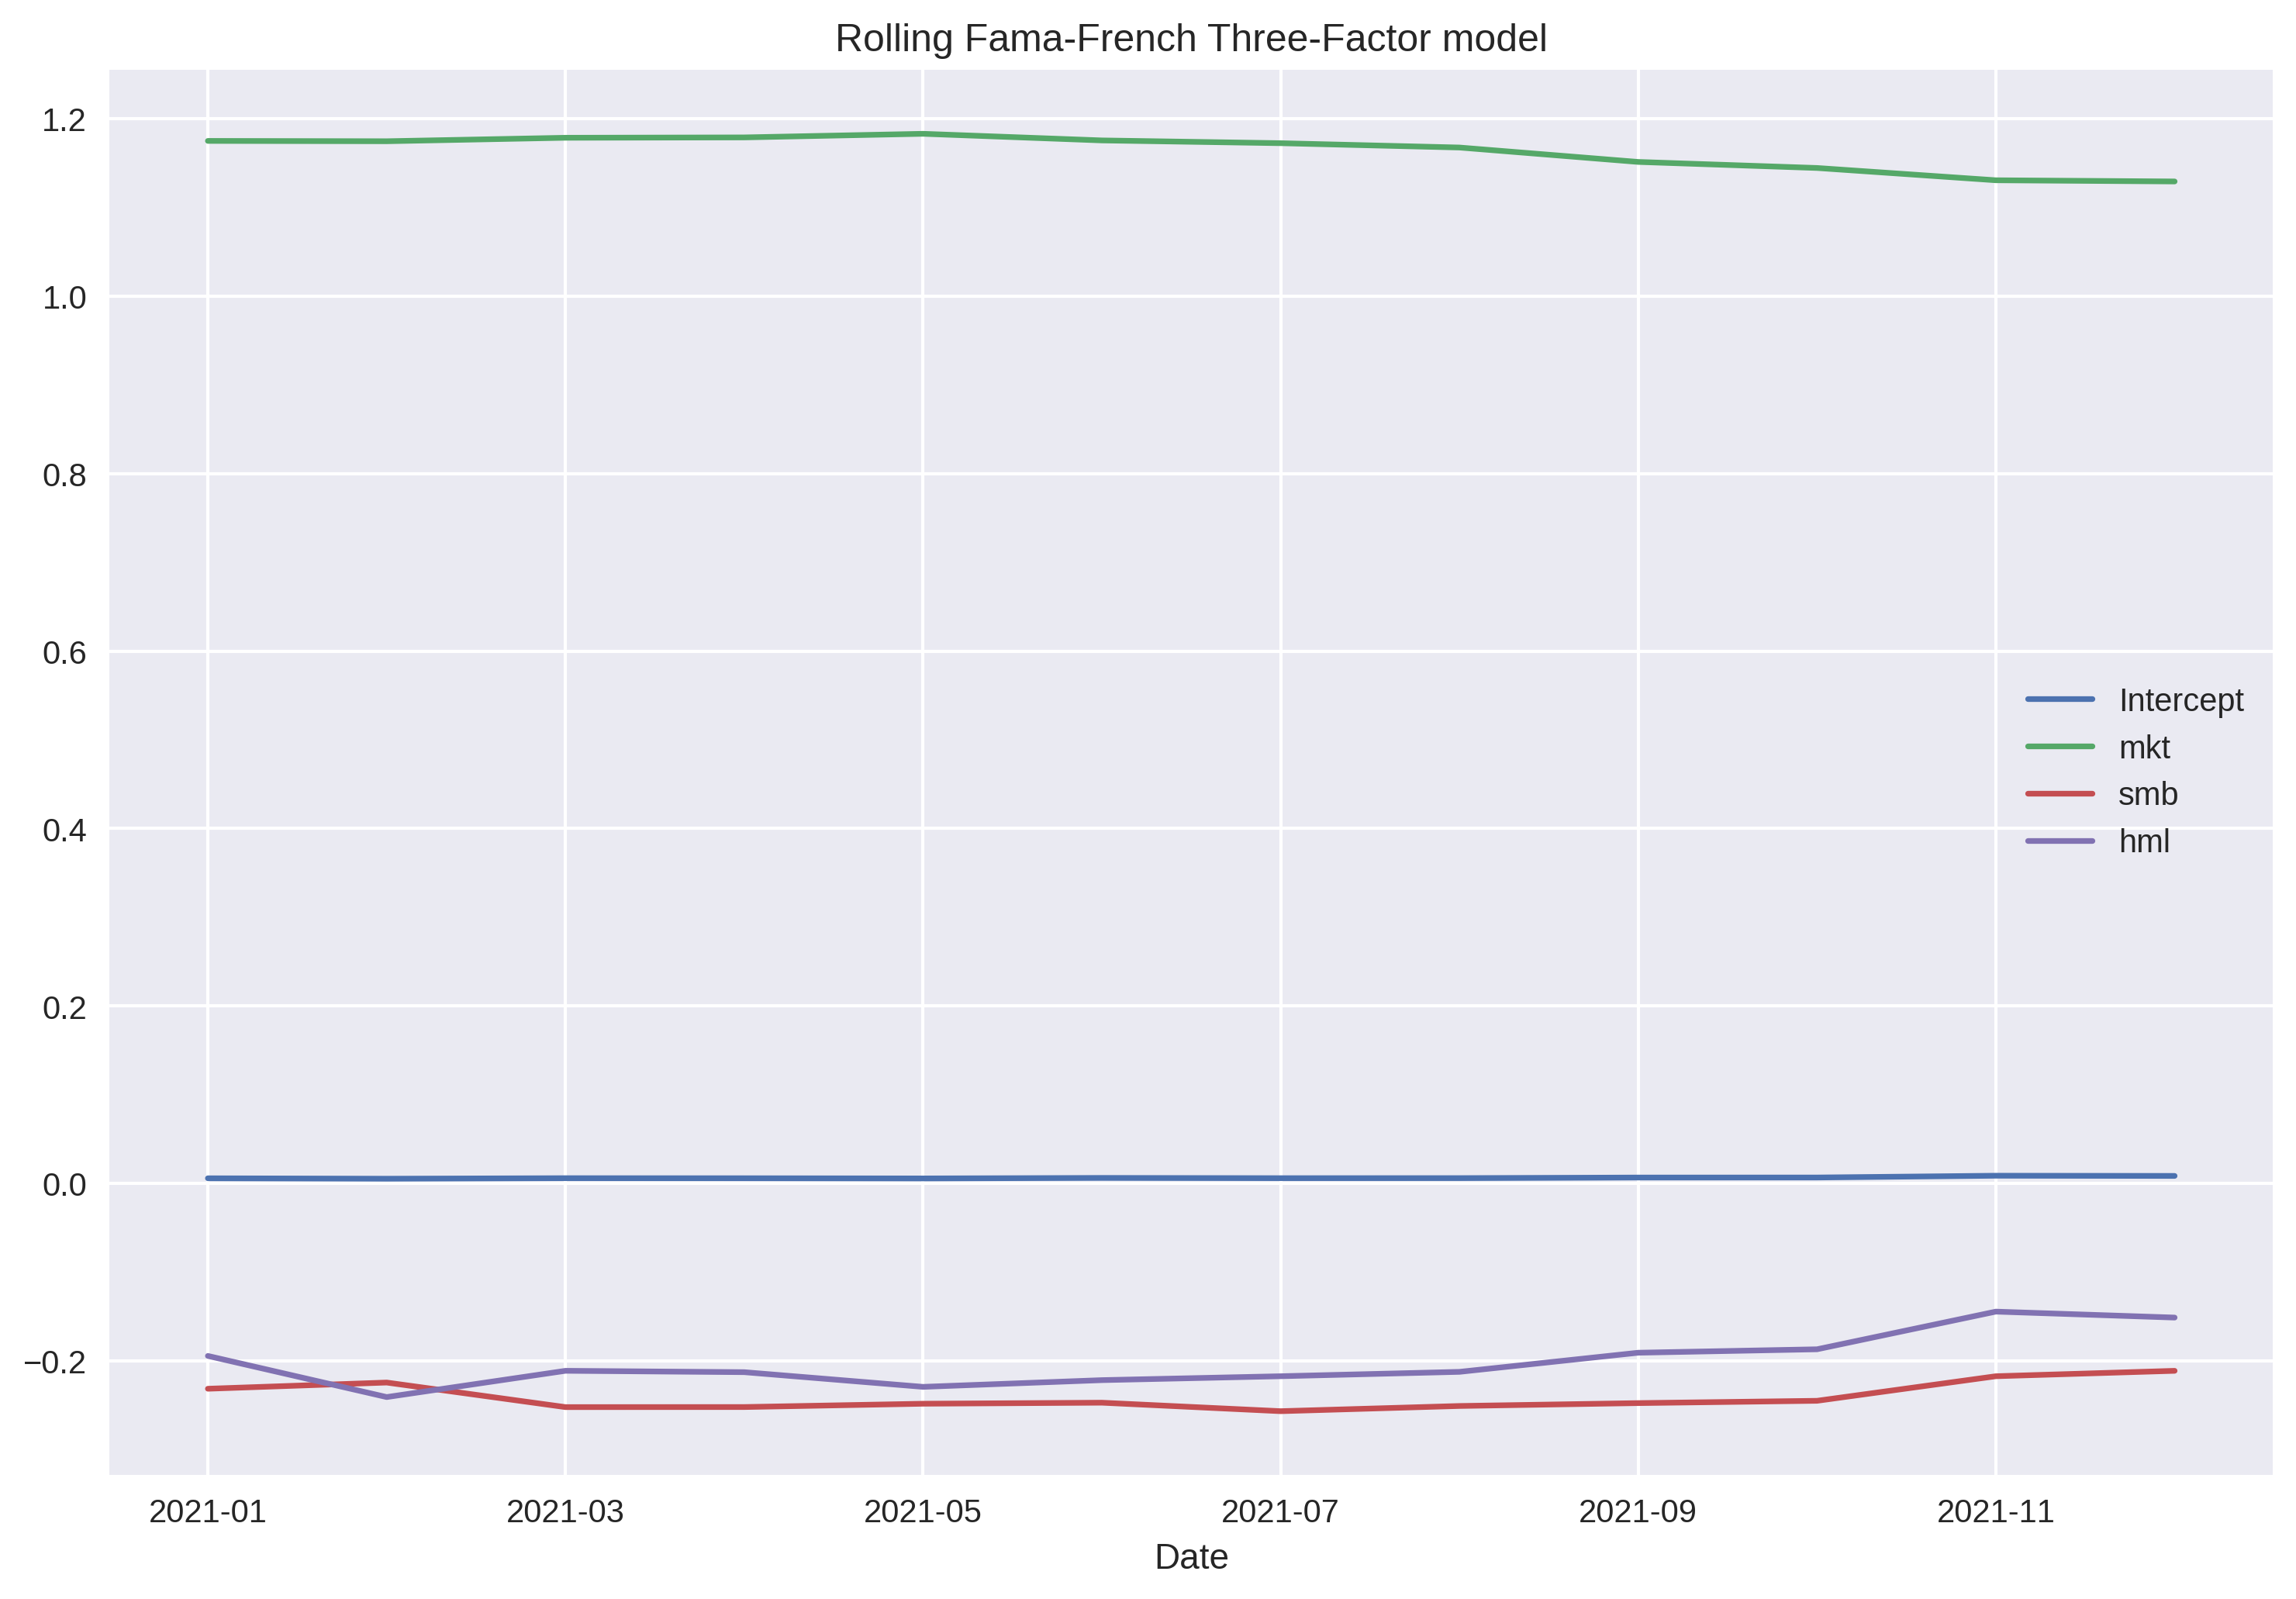

In [50]:
MODEL_FORMULA = 'portf_ex_rtn ~ mkt + smb + hml'
results_df = rolling_factor_model(ff_data, 
                                  MODEL_FORMULA, 
                                  window_size=60)

results_df.plot(title = 'Rolling Fama-French Three-Factor model')

# Implementing the four- and five-factor models
MOM: "We use six value-weight portfolios formed on size and prior (2-12) returns to construct Mom. The portfolios, which are formed monthly, are the intersections of 2 portfolios formed on size (market equity, ME) and 3 portfolios formed on prior (2-12) return. The monthly size breakpoint is the median NYSE market equity. The monthly prior (2-12) return breakpoints are the 30th and 70th NYSE percentiles.

Mom is the average return on the two high prior return portfolios minus the average return on the two low prior return portfolios,

 	Mom =	1/2 (Small High + Big High) - 1/2(Small Low + Big Low).	 



In [51]:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf
import pandas_datareader.data as web

RISKY_ASSET = ['^GSPC','AAPL','AMZN','GOOGL','FB', 'MCD', 'GM', 'TSLA','PFE']
START_DATE = '2016-01-01'
END_DATE = '2021-12-31'

# three factors 
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                                 start=START_DATE)[0]
df_three_factor.index = df_three_factor.index.format()

print(df_three_factor)

# momentum factor
df_mom = web.DataReader('F-F_Momentum_Factor', 'famafrench', 
                        start=START_DATE)[0]
df_mom.index = df_mom.index.format()
print(df_mom)

# five factors
df_five_factor = web.DataReader('F-F_Research_Data_5_Factors_2x3', 
                                'famafrench', 
                                start=START_DATE)[0]
df_five_factor.index = df_five_factor.index.format()


         Mkt-RF   SMB    HML    RF
2016-01   -5.77 -3.39   2.07  0.01
2016-02   -0.08  0.81  -0.57  0.02
2016-03    6.96  0.75   1.10  0.02
2016-04    0.92  0.67   3.21  0.01
2016-05    1.78 -0.19  -1.65  0.01
...         ...   ...    ...   ...
2021-10    6.65 -2.28  -0.44  0.00
2021-11   -1.55 -1.35  -0.53  0.00
2021-12    3.10 -1.57   3.23  0.01
2022-01   -6.24 -5.87  12.79  0.00
2022-02   -2.29  2.19   3.12  0.00

[74 rows x 4 columns]
         Mom   
2016-01    1.39
2016-02   -4.26
2016-03   -5.04
2016-04   -6.07
2016-05    1.37
...         ...
2021-10    3.21
2021-11    0.82
2021-12   -2.67
2022-01   -2.53
2022-02    1.74

[74 rows x 1 columns]


In [52]:
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')


Downloaded 1510 rows of data.


In [53]:
y = asset_df['Adj Close'].resample('M') \
                         .last() \
                         .pct_change() \
                         

y.index = y.index.strftime('%Y-%m')
y.name = 'return'

WEIGHTS = [0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11]
df3 = df_three_factor.join(df_mom)

# join all datasets on the index
four_factor_data= pd.merge(df3, y, left_index=True, right_index=True, how = 'left').dropna()

#Calculate the portfolio returns:
four_factor_data['rtn'] = np.matmul(four_factor_data[ASSETS].values,WEIGHTS)

four_factor_data = four_factor_data.drop(ASSETS, axis=1)

# # four_factor_data = df_three_factor.join(df_mom).join(y)

# rename columns
four_factor_data.columns = ['mkt', 'smb', 'hml', 'rf', 'mom', 'rtn']

# divide everything (except returns) by 100
four_factor_data.loc[:, four_factor_data.columns != 'rtn'] /= 100

# convert index to datetime
four_factor_data.index = [pd.to_datetime(x, format='%Y-%m') for x in four_factor_data.index]

# select period of interest
four_factor_data = four_factor_data.loc[START_DATE:END_DATE]

# calculate excess returns
four_factor_data['excess_rtn'] = four_factor_data.rtn - four_factor_data.rf



### Five Factor Model
RMW: profitability factor RMW is the difference between the returns of firms with robust (high) and weak (low) operating profitability;
CMA:  the investment factor CMA is the difference between the returns of firms that invest conservatively and firms that invest aggressively.


In [54]:
# join all datasets on the index
five_factor_data= pd.merge(df_five_factor, y, left_index=True, right_index=True, how = 'left').dropna()

#five_factor_data = df_five_factor.join(y)

#Calculate the portfolio returns:
five_factor_data['rtn'] = np.matmul(five_factor_data[ASSETS].values,WEIGHTS)

five_factor_data = five_factor_data.drop(ASSETS, axis=1)

# rename columns
five_factor_data.columns = ['mkt', 'smb', 'hml', 'rmw', 'cma', 'rf', 'rtn']



# divide everything (except returns) by 100
five_factor_data.loc[:, five_factor_data.columns != 'rtn'] /= 100

# convert index to datetime
five_factor_data.index = [pd.to_datetime(x, format='%Y-%m') for x in five_factor_data.index]

# select period of interest
five_factor_data = five_factor_data.loc[START_DATE:END_DATE]

# calculate excess returns
five_factor_data['excess_rtn'] = five_factor_data.rtn - five_factor_data.rf

five_factor_data.head()


,mkt,smb,hml,rmw,cma,rf,rtn,excess_rtn
2016-02-01,-0.0008,0.0093,-0.0057,0.0332,0.0196,0.0002,-0.025832,-0.026032
2016-03-01,0.0696,0.0101,0.0110,0.0073,-0.0002,0.0002,0.082285,0.082085
2016-04-01,0.0092,0.0115,0.0321,-0.0292,0.0189,0.0001,0.011206,0.011106
2016-05-01,0.0178,-0.0064,-0.0165,-0.0109,-0.0249,0.0001,0.021771,0.021671
2016-06-01,-0.0005,0.0043,-0.0145,0.0146,0.0194,0.0002,-0.030279,-0.030479


                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     52.73
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           7.31e-20
Time:                        05:14:03   Log-Likelihood:                 156.73
No. Observations:                  71   AIC:                            -303.5
Df Residuals:                      66   BIC:                            -292.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0063      0.004      1.787      0.0

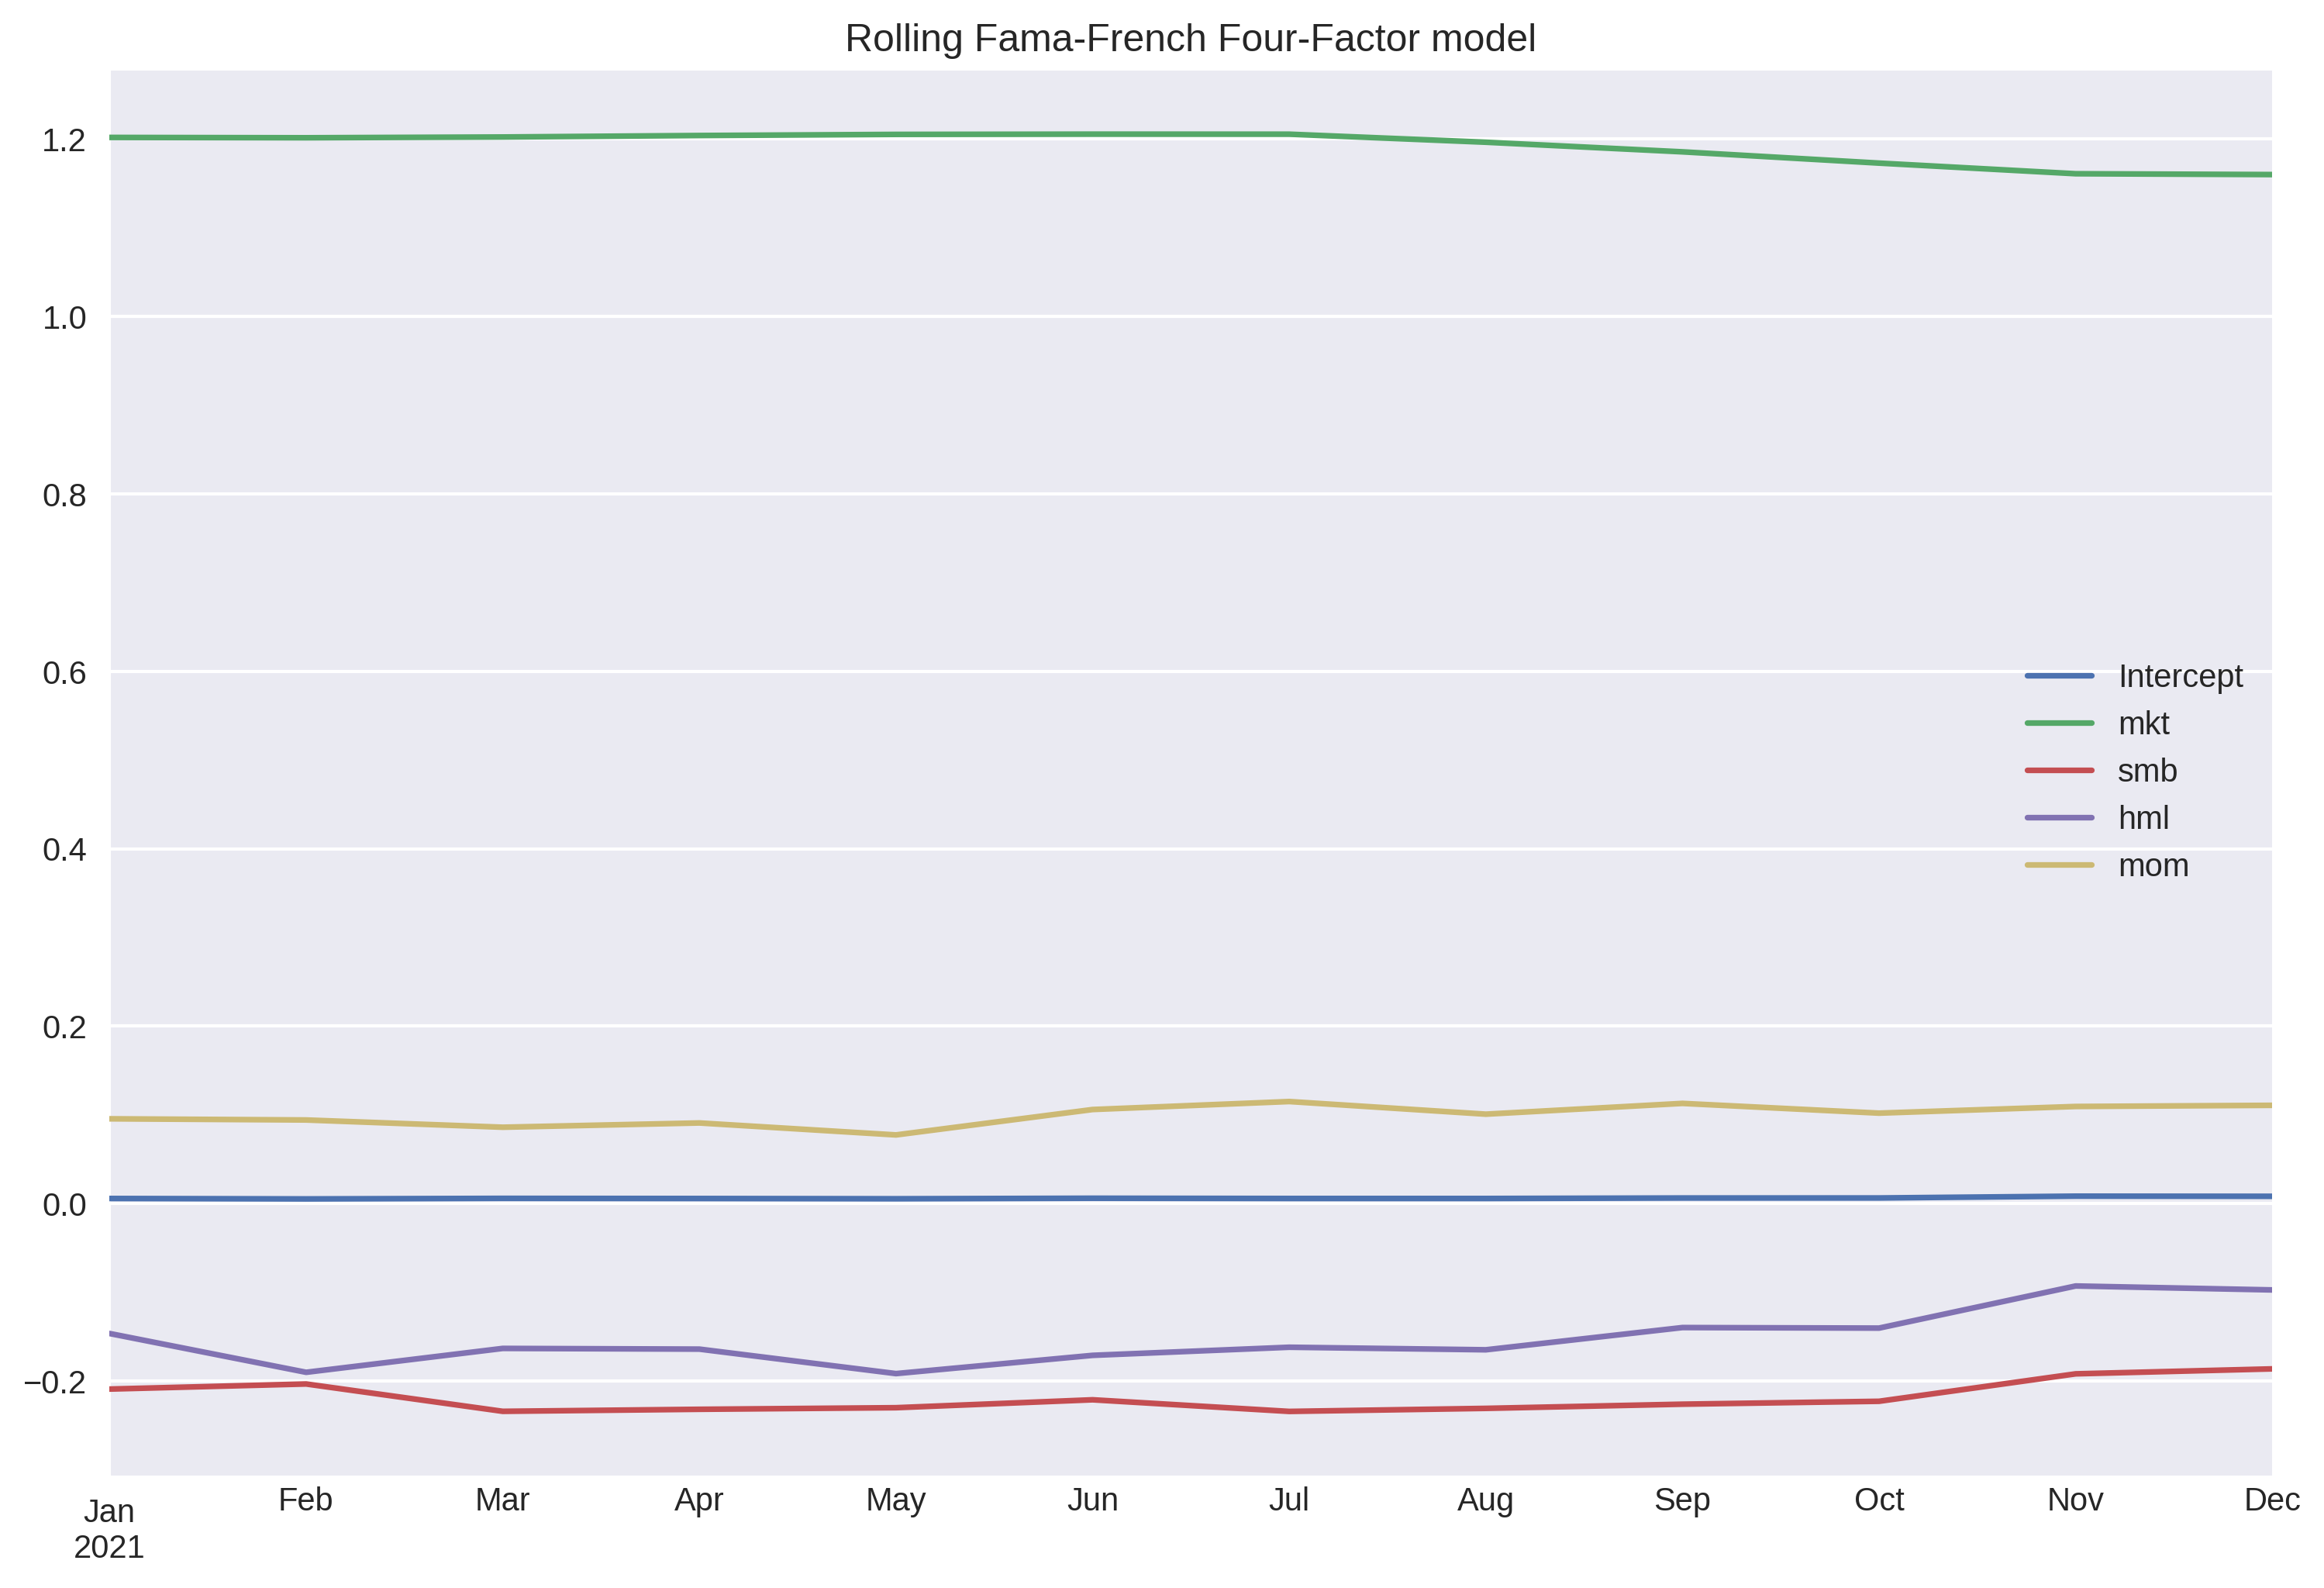

In [55]:
MODEL_FORMULA4 = 'excess_rtn ~ mkt + smb + hml + mom'
four_factor_model = smf.ols(formula=MODEL_FORMULA4, 
                            data=four_factor_data).fit()

print(four_factor_model.summary())

results_df4 = rolling_factor_model(four_factor_data, 
                                  MODEL_FORMULA4, 
                                  window_size=60)

results_df4.plot(title = 'Rolling Fama-French Four-Factor model')

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     43.04
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           2.40e-19
Time:                        05:14:04   Log-Likelihood:                 157.68
No. Observations:                  71   AIC:                            -303.4
Df Residuals:                      65   BIC:                            -289.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0056      0.004      1.591      0.1

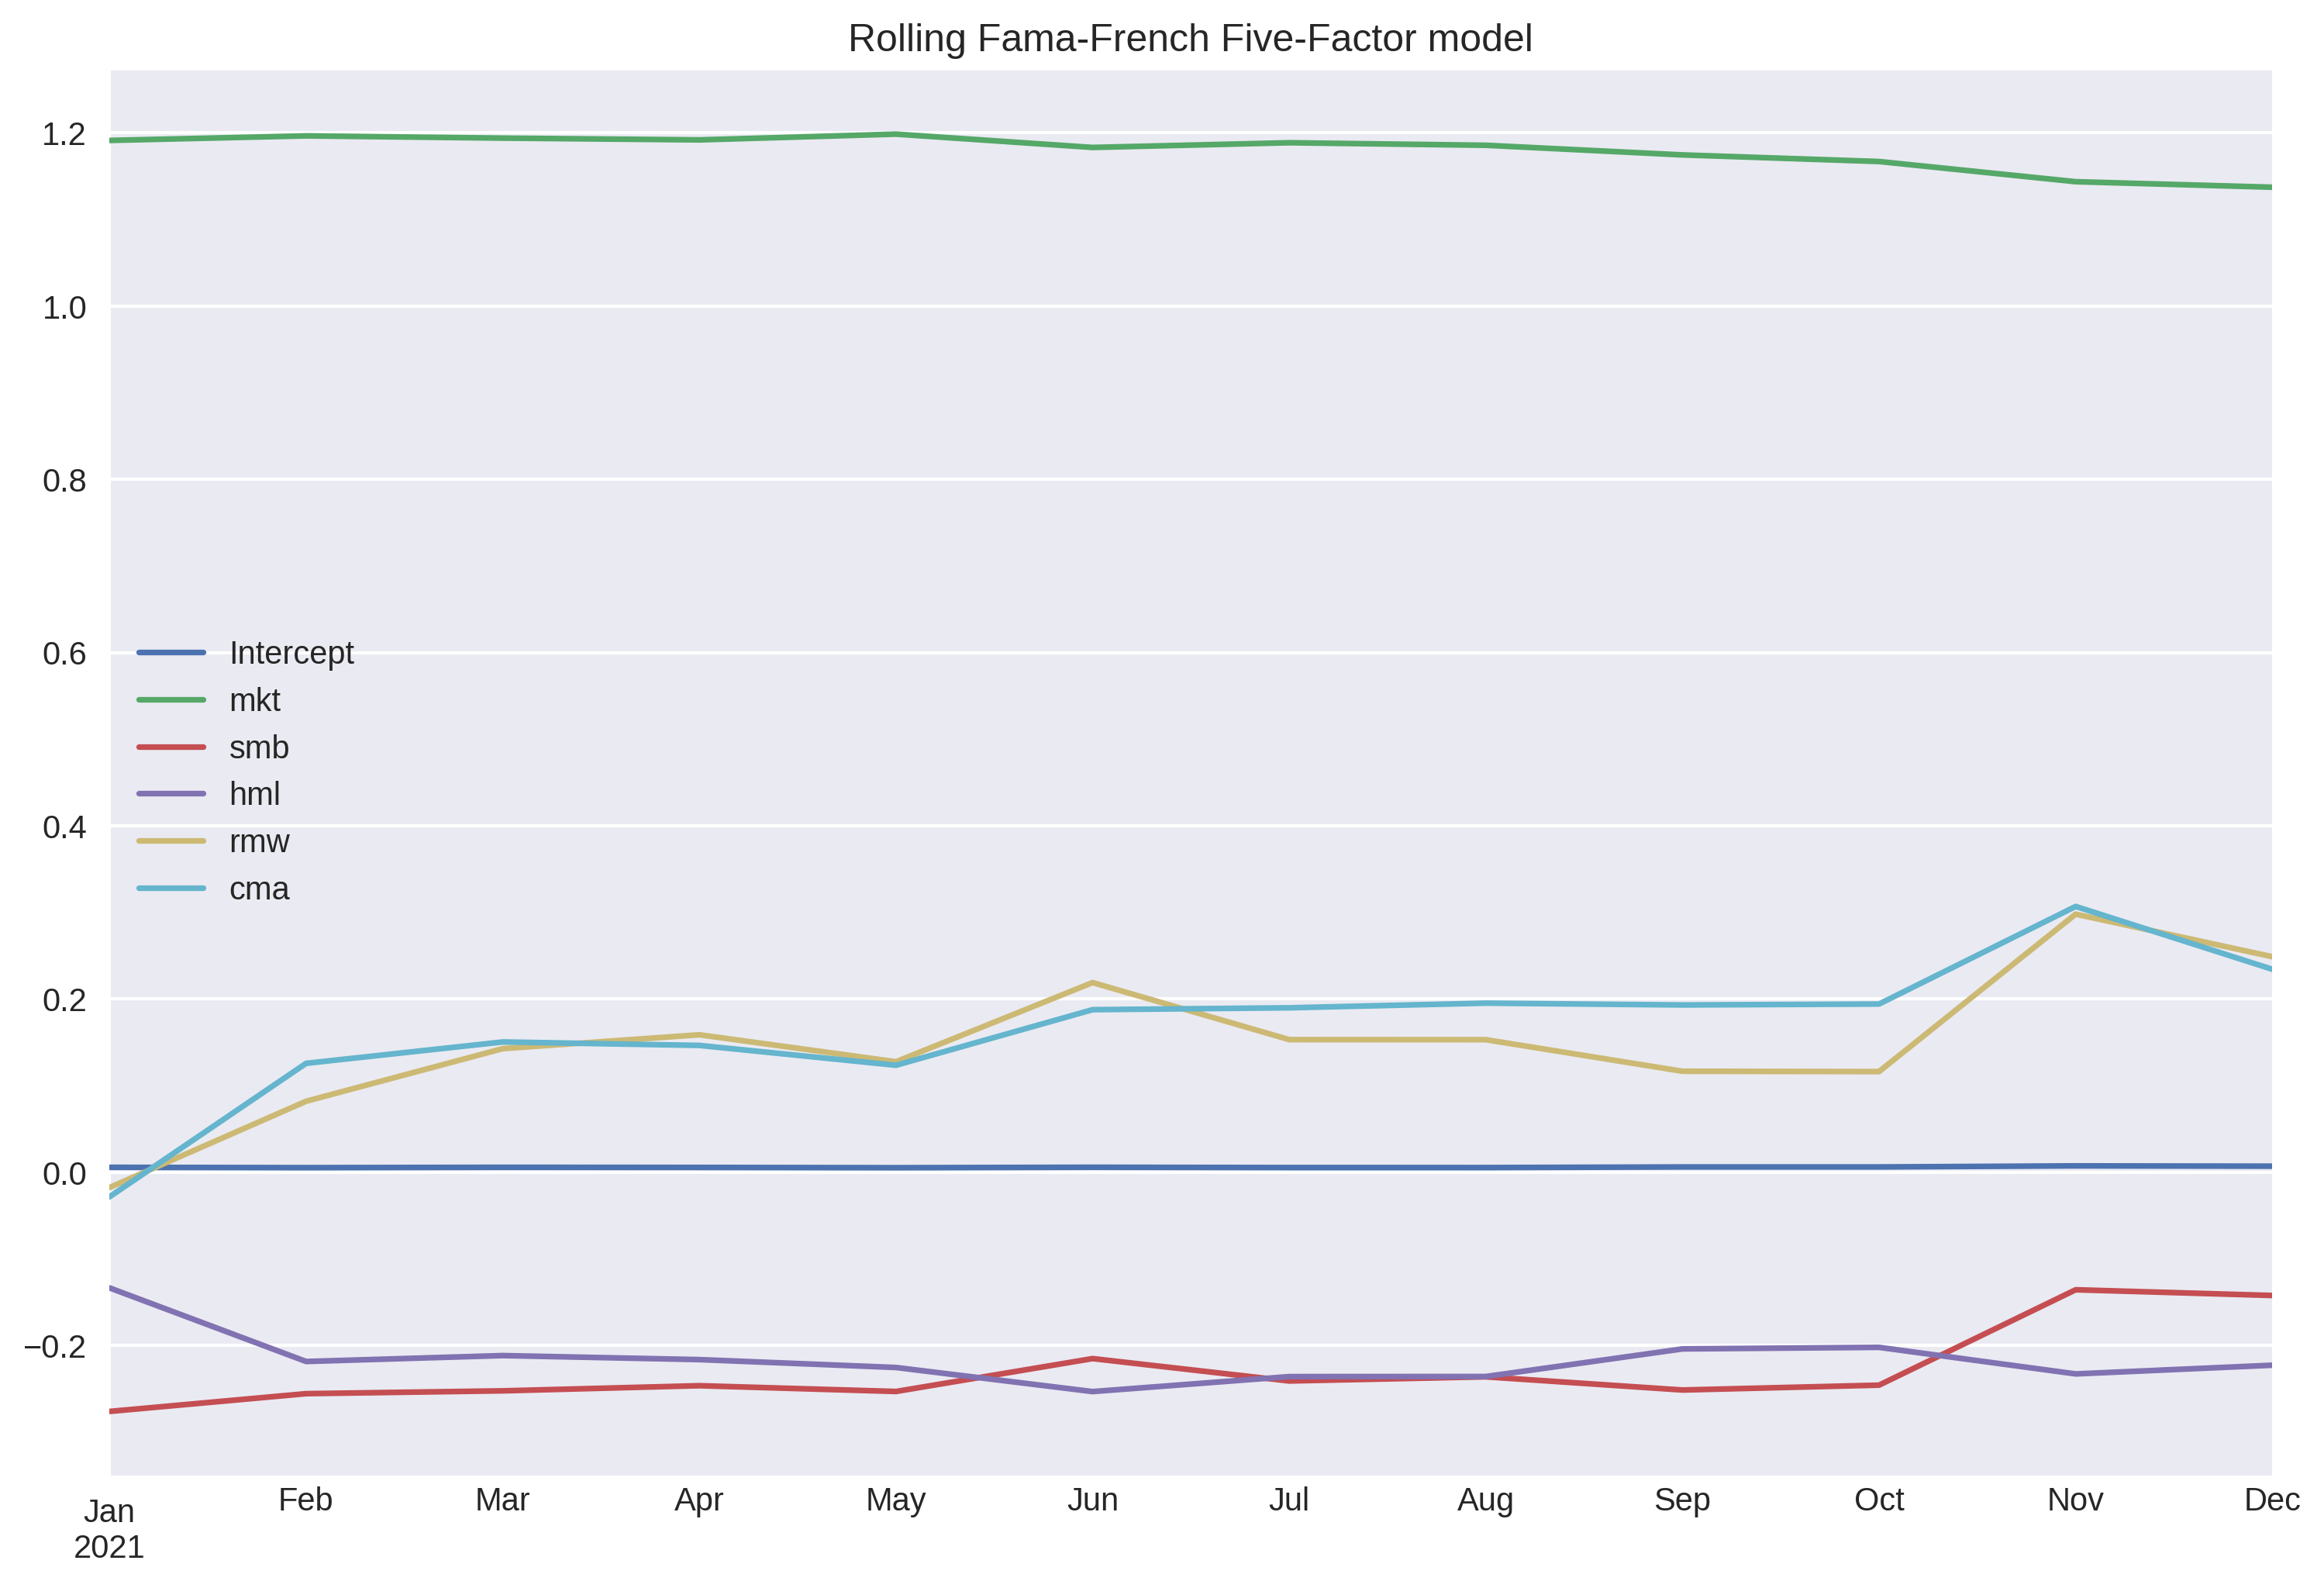

In [56]:
MODEL_FORMULA5 = 'excess_rtn ~ mkt + smb + hml + rmw + cma'
five_factor_model = smf.ols(
    formula=MODEL_FORMULA5, 
    data=five_factor_data
).fit()

print(five_factor_model.summary())

results_df5 = rolling_factor_model(five_factor_data, 
                                  MODEL_FORMULA5, 
                                  window_size=60)

results_df5.plot(title = 'Rolling Fama-French Five-Factor model')

# Stylized facts of asset returns

1. Import the libraries and dwonload the data

In [57]:
import pandas as pd 
import numpy as np
import yfinance as yf
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

df = yf.download('^GSPC', 
                 start='1985-01-01', 
                 end='2018-12-31',
                 progress=False)

df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how = 'any')

### Fact 1 - distribution of returns 

1. Calculate the Normal PDF using the mean and standard deviation of the observed returns:

In [58]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)   

2. Plot the histogram and the Q-Q Plot

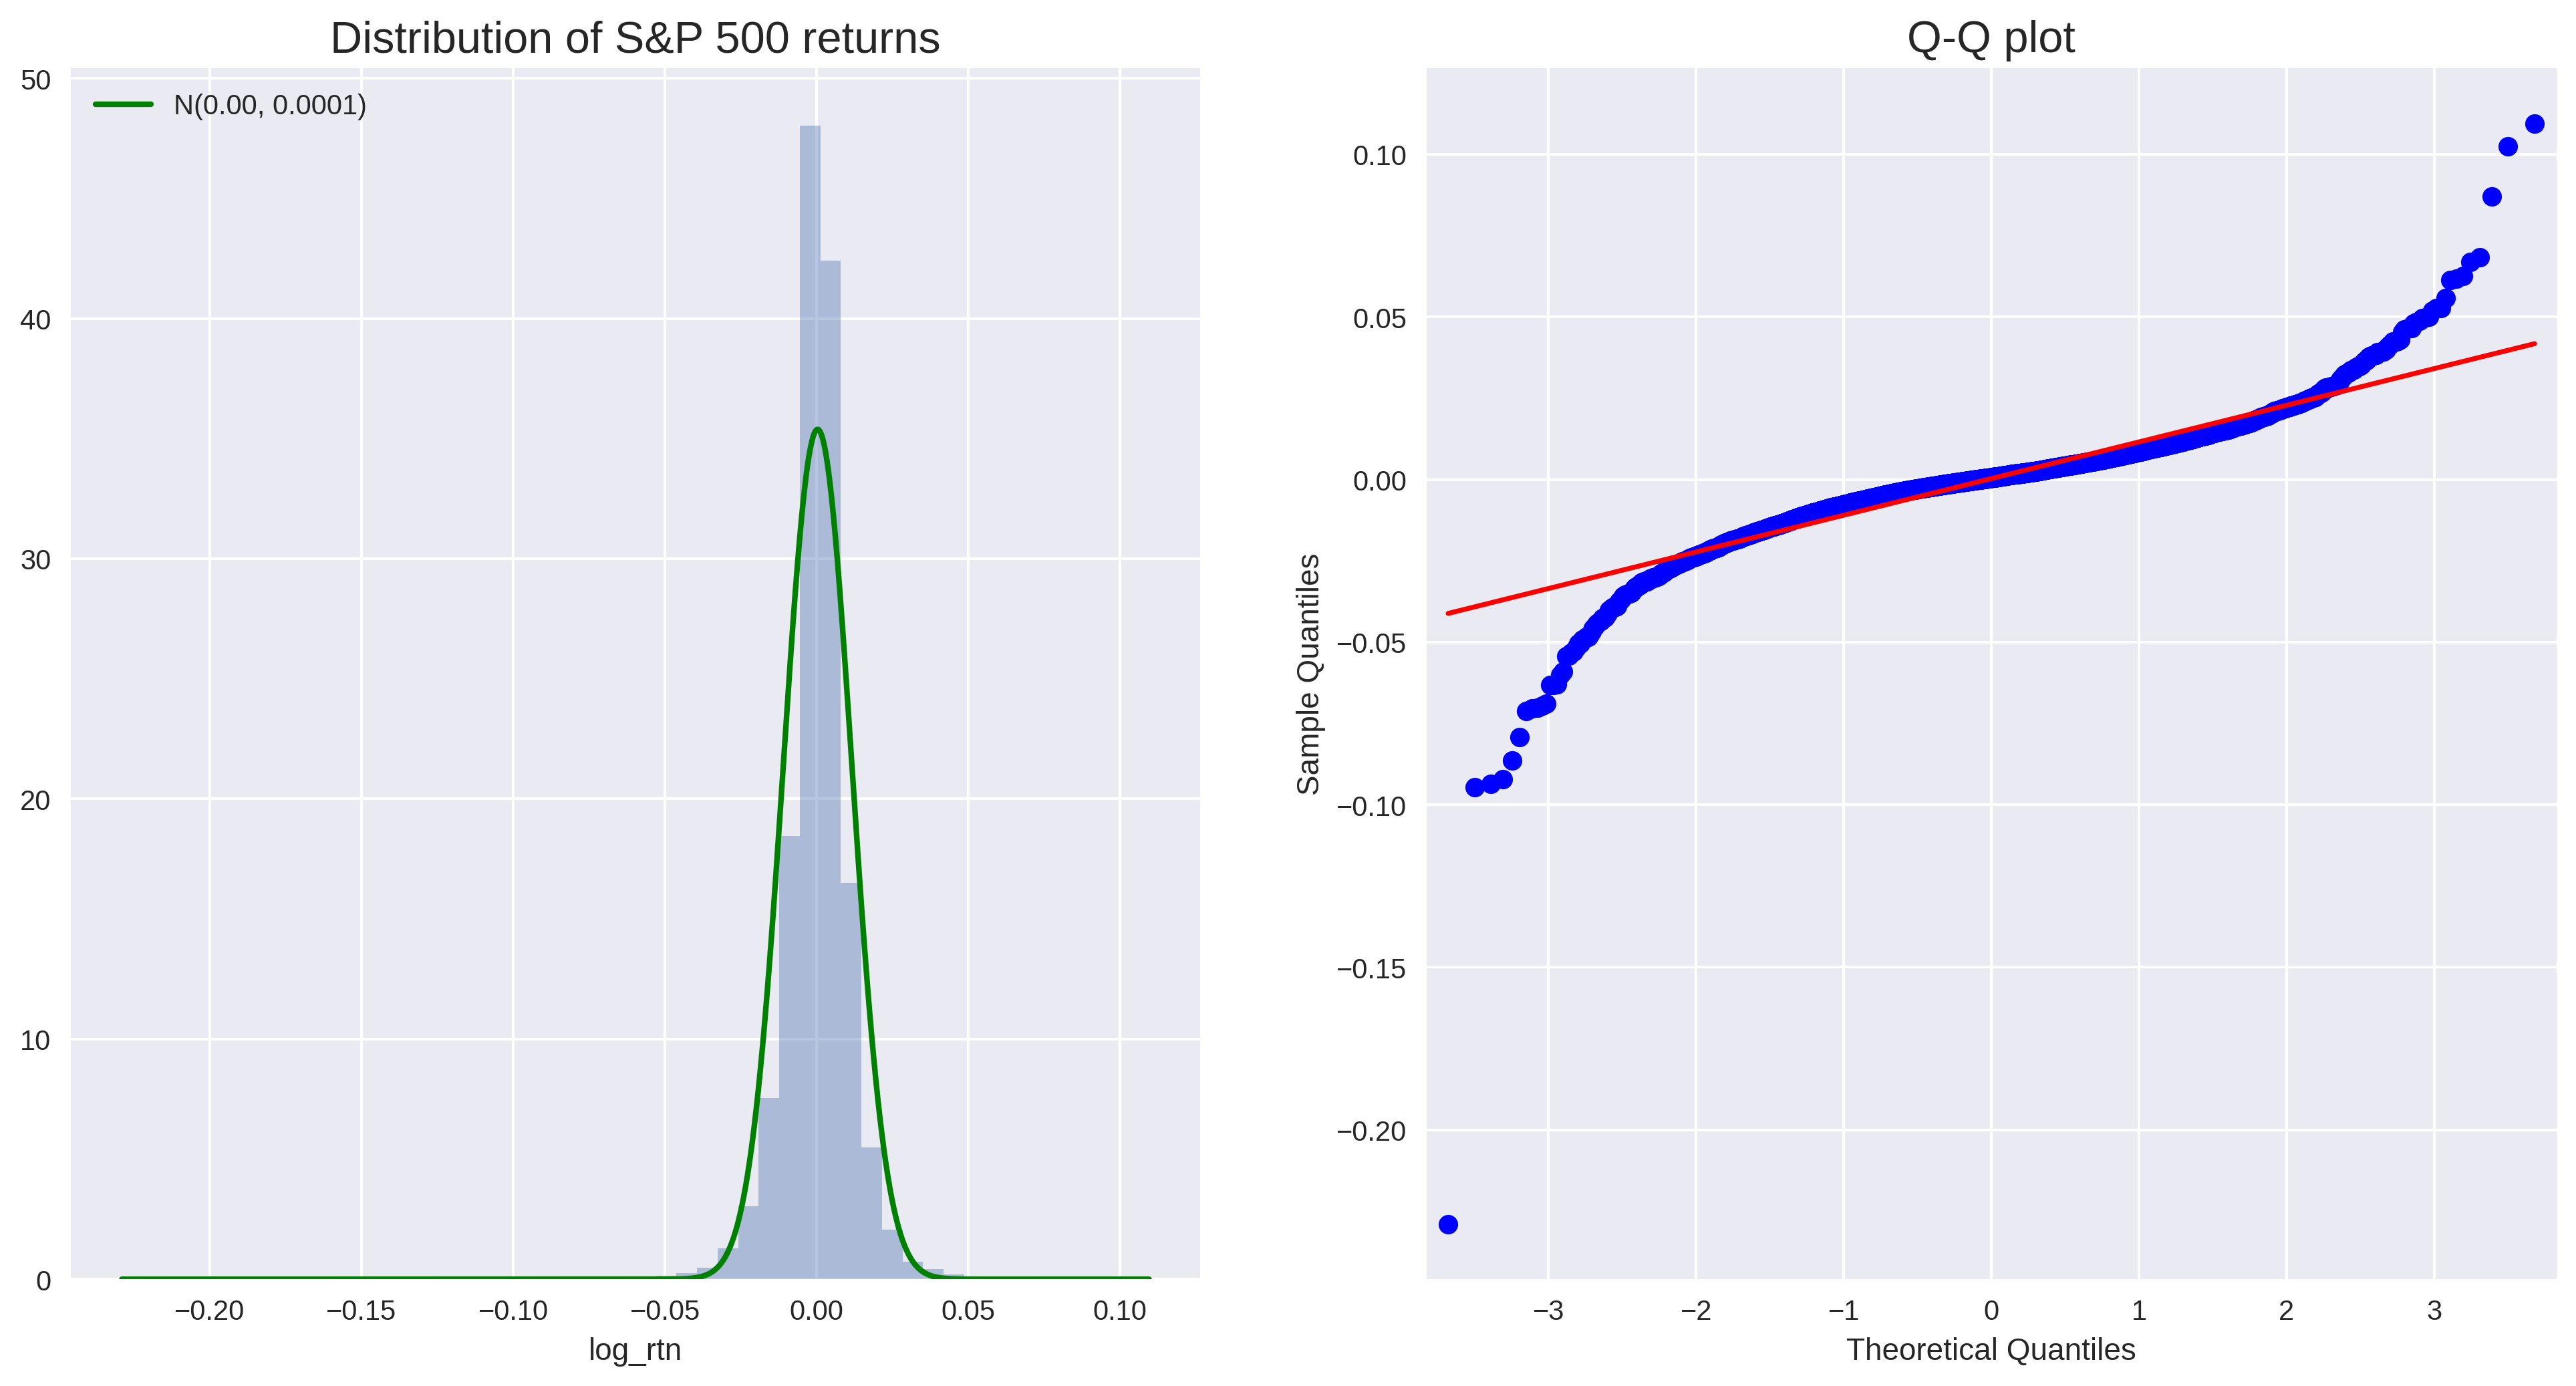

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])                                    
ax[0].set_title('Distribution of S&P 500 returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

3. Print the summary statistics of the log returns

In [60]:
jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 1985-01-03 - 2018-12-28
Number of observations: 8568
Mean: 0.0003
Median: 0.0006
Min: -0.2290
Max: 0.1096
Standard Deviation: 0.0113
Skewness: -1.2628
Kurtosis: 28.0156
Jarque-Bera statistic: 282134.38 with p-value: 0.00
